In [1]:
import torch
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import meshzoo

from torchfem.elements import linear_to_quadratic
from torchfem import Solid
from torchfem.materials import Isotropic

torch.set_default_dtype(torch.float64)

# Material model
material = Isotropic(E=1000.0, nu=0.3)

# 3D Cube with linear hexaeders

In [2]:
# Generate cube
points, cells = meshzoo.cube_hexa(
    torch.linspace(0.0, 1.0, 5),
    torch.linspace(0.0, 1.0, 5),
    torch.linspace(0.0, 1.0, 5),
)
nodes = torch.tensor(points)
elements = torch.tensor(cells.tolist())

# Assign boundary conditions
forces = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[nodes[:, 0] == 0.0, :] = True
constraints[nodes[:, 0] == 1.0, 0] = True
displacements = torch.zeros_like(nodes)
displacements[nodes[:, 0] == 1.0, 0] = 0.1

# Create model
box = Solid(nodes, elements, forces, displacements, constraints, material.C())

# Solve
u, f = box.solve()

# Plot
box.plot(u=u, node_property={"Disp": u})

Widget(value='<iframe src="http://localhost:59657/index.html?ui=P_0x1660ee110_0&reconnect=auto" class="pyvista…

## 3D Cube with quadratic hexaeders

In [3]:
# Upgrade elements to quadratic
nodes, elements = linear_to_quadratic(nodes, elements)

# Assign boundary conditions
forces = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[nodes[:, 0] == 0.0, :] = True
constraints[nodes[:, 0] == 1.0, 0] = True
displacements = torch.zeros_like(nodes)
displacements[nodes[:, 0] == 1.0, 0] = 0.1

# Create model
box = Solid(nodes, elements, forces, displacements, constraints, material.C())

# Solve
u, f = box.solve()

# Plot
box.plot(u=u, node_property={"Disp": u})

Widget(value='<iframe src="http://localhost:59657/index.html?ui=P_0x138ccfca0_1&reconnect=auto" class="pyvista…

# 3D Cube with linear hexaeders and inelastic (e.g. thermal) strain

In [4]:
# Reset constraints
displacements = torch.zeros_like(nodes)
constraints[:, :] = False
constraints[nodes[:, 0] == 0.0, 0] = True
constraints[nodes[:, 0] == 1.0, 0] = True
constraints[nodes[:, 1] == 0.5, 1] = True
constraints[nodes[:, 2] == 0.5, 2] = True

# Set inelastic strain (isotropic shrinkage)
s = -0.1
strains = torch.stack(len(elements) * [torch.tensor([s, s, s, 0.0, 0.0, 0.0])])

box = Solid(nodes, elements, forces, displacements, constraints, material.C(), strains)

In [5]:
u, f = box.solve()
box.plot(u=u, node_property={"Disp": u}, show_undeformed=True)

Widget(value='<iframe src="http://localhost:59657/index.html?ui=P_0x138cceb90_2&reconnect=auto" class="pyvista…

In [6]:
sigma = box.compute_stress(u)
print(f"Mean stress in x is {sigma[:,0].mean()}. It should be {-material.E() * s}.")

Mean stress in x is 100.00000000000009. It should be 100.0.


## 3D Cube with linear tetrahedrons

In [7]:
# Generate cube
points, cells = meshzoo.cube_tetra(
    torch.linspace(0.0, 1.0, 3),
    torch.linspace(0.0, 1.0, 3),
    torch.linspace(0.0, 1.0, 3),
)
nodes = torch.tensor(points)
elements = torch.tensor(cells.tolist())

# Assign boundary conditions
forces = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[nodes[:, 0] == 0.0, :] = True
constraints[nodes[:, 0] == 1.0, 0] = True
displacements = torch.zeros_like(nodes)
displacements[nodes[:, 0] == 1.0, 0] = 0.1


box = Solid(nodes, elements, forces, displacements, constraints, material.C())

u, f = box.solve()

box.plot(u=u, node_property={"Disp": u})

Widget(value='<iframe src="http://localhost:59657/index.html?ui=P_0x17b03b670_3&reconnect=auto" class="pyvista…

## 3D Cube with quadratic tetrahedrons

In [8]:
nodes, elements = linear_to_quadratic(nodes, elements)

# Assign boundary conditions
forces = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[nodes[:, 0] == 0.0, :] = True
constraints[nodes[:, 0] == 1.0, 0] = True
displacements = torch.zeros_like(nodes)
displacements[nodes[:, 0] == 1.0, 0] = 0.1


box = Solid(nodes, elements, forces, displacements, constraints, material.C())

u, f = box.solve()

box.plot(u=u, node_property={"Disp": u})

Widget(value='<iframe src="http://localhost:59657/index.html?ui=P_0x17b03ab30_4&reconnect=auto" class="pyvista…

# 3D Cube with tetrahedrons and inelastic (e.g. thermal) strain

In [9]:
# Reset constraints
displacements = torch.zeros_like(nodes)
constraints[:, :] = False
constraints[nodes[:, 0] == 0.0, 0] = True
constraints[nodes[:, 0] == 1.0, 0] = True
constraints[nodes[:, 1] == 0.5, 1] = True
constraints[nodes[:, 2] == 0.5, 2] = True

# Set inelastic strain (isotropic shrinkage)
s = -0.1
strains = torch.stack(len(elements) * [torch.tensor([s, s, s, 0.0, 0.0, 0.0])])

box = Solid(nodes, elements, forces, displacements, constraints, material.C(), strains)

In [10]:
u, f = box.solve()
box.plot(u=u, node_property={"Disp": u}, show_undeformed=True)

Widget(value='<iframe src="http://localhost:59657/index.html?ui=P_0x17b03bd90_5&reconnect=auto" class="pyvista…

In [11]:
sigma = box.compute_stress(u)
print(f"Mean stress in x is {sigma[:,0].mean()}. It should be {-material.E() * s}.")

Mean stress in x is 99.99999999999999. It should be 100.0.


# Plasticity
We subject a 3D unit cube meshed with linear hexahedrons to a uniaxial stress state in the x-direction. The displacement is increased in increments and the material yields when the stress reaches a critical value. The material is modeled with a von Mises yield criterion and a linear isotropic hardening law.


In [12]:
# Generate cube
points, cells = meshzoo.cube_hexa(
    torch.linspace(0.0, 1.0, 5),
    torch.linspace(0.0, 1.0, 5),
    torch.linspace(0.0, 1.0, 5),
)
nodes = torch.tensor(points)
elements = torch.tensor(cells.tolist())

# Set constraints
forces = torch.zeros_like(nodes)
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[nodes[:, 0] == 0.0, 0] = True
constraints[nodes[:, 0] == 1.0, 0] = True
constraints[nodes[:, 1] == 0.5, 1] = True
constraints[nodes[:, 2] == 0.5, 2] = True

box = Solid(nodes, elements, forces, displacements, constraints, material.C())

#### Material model
We employ a von Mises yield criterion with isotropic linear hardening. The plastic hardening function is given by

$$
\sigma_f(q) = \sigma_y + k q
$$

with the yield stress $\sigma_y$, the equivalent plastic strain $q$ and the hardening modulus $k$.

In [13]:
E = 1000.0
nu = 0.3
sigma_y = 50.0
k = 100.0

# Elastic properties
material = Isotropic(E=E, nu=nu)
C = material.C()
G = material.G()


# Hardening function
def sigma_f(q):
    return sigma_y + k * q


# Derivative of the hardening function
def sigma_f_prime(q):
    return k

#### Incremental loading with radial return mapping algorithm 
We implement a radial return mapping algorithm to solve the plasticity problem. In each increment, we calculate the trial stress 
$$ 
\sigma_{\text{trial}} = \sigma_n + C : \Delta\varepsilon
$$
and check if it exceeds the yield surface by evaluating the flow potential
$$ 
f = ||\sigma_{\text{trial}}'|| - \sqrt{\frac{2}{3}}\sigma_f(q).
$$
Here, $||\sigma_{\text{trial}}'||$ denotes the Frobenius norm of the deviatoric part of the trial stress.

1. If $f \leq 0$, the stress state is elastic. We update the variables as follows: 
$$
\sigma_{n+1} = \sigma_{\text{trial}} \\ q_{n+1} = q_{n}\\ d\sigma d\varepsilon_{n+1} = C.
$$

2. If $f > 0$, the stress state is plastic. We need to calculate the equivalent plastic strain $\Delta \gamma$ that leads to $f=0$ to satisfy the yield condition. This is generally a nonlinear equation and we solve it with Newton's method (in case of linear hardening, this is essentially solved in the first step...). We assume, that the direction of of flow is given by the deviatoric part of the trial stress, i.e. $n = \frac{\sigma_{\text{trial}}'}{||\sigma_{\text{trial}}'||}$.
Then, we update the variables as follows: 

$$
\sigma_{n+1} = \sigma_{\text{trial}} - 2 G \Delta \gamma n \\
\quad q_{n+1} = q_{n} + \sqrt{\frac{2}{3}} \Delta \gamma \\
(d\sigma d\varepsilon)_{ijkl} = C_{ijkl} 
    - \frac{2 G}{1 + \frac{\sigma_f'}{3 \mu}} n_{ij} n_{kl}
    - \frac{4 G^2 \Delta\gamma}{||s||} \left(\frac{1}{2} \left( \delta_{ik}\delta_{jl} + \delta_{il}\delta_{kj} \right)
         - \frac{1}{3} \delta_{ij} \delta_{kl}
        - n_{ij} n_{lk} \right)
$$

In [14]:
# Initialize variables
n_elem = len(box.elements)
u = torch.zeros_like(box.nodes)
q = torch.zeros((n_elem))
epsilon = torch.zeros((n_elem, 6))
sigma = torch.zeros((n_elem, 6))

stress = [0.0]
strain = [0.0]

# Incremental loading
increments = 50 * [0.002] + 50 * [-0.002]

for inc in increments:
    # Set displacement increment
    box.displacements[box.nodes[:, 0] == 1.0, 0] = inc

    # Solve small deformation increment
    du, df = box.solve()

    # Strain increment
    de = box.compute_strain(du)
    epsilon += de

    # Compute trial stress
    ds = torch.einsum("...ij,...j->...i", C, de)
    s_trial = sigma + ds

    # Compute the deviatoric trial stress
    s_trial_trace = s_trial[:, 0] + s_trial[:, 1] + s_trial[:, 2]
    dev = s_trial.clone()
    dev[:, 0:3] -= s_trial_trace[:, None] / 3
    dev_norm = torch.sqrt((dev[:, 0:3] ** 2 + 2 * dev[:, 3:6] ** 2).sum(dim=-1))

    # Flow potential
    f = dev_norm - sqrt(2.0 / 3.0) * sigma_f(q)
    fm = f > 0

    # Direction of flow
    n = dev[fm] / dev_norm[fm, None]

    # Local Newton solver to find plastic strain increment
    dGamma = torch.zeros_like(f[fm])
    for j in range(10):
        res = dev_norm[fm] - 2.0 * G * dGamma - sqrt(2.0 / 3.0) * sigma_f(q[fm])
        ddGamma = res / (2.0 * G + 2.0 / 3.0 * sigma_f_prime(q[fm]))
        dGamma += ddGamma
        q[fm] += sqrt(2.0 / 3.0) * ddGamma
    if (torch.abs(res) > 1e-10).any():
        print("Local Newton iteration did not converge")

    # Update stress
    sigma[~fm] = s_trial[~fm]
    sigma[fm] = s_trial[fm] - 2.0 * G * dGamma[:, None] * n

    # Update algorithmic tangent
    box.C[~fm] = C
    A = 2.0 * G / (1.0 + sigma_f_prime(q[fm]) / (3.0 * G))
    B = 4.0 * G**2 * dGamma / dev_norm[fm]
    box.C[fm, 0, 0] = C[0, 0] - A * n[:, 0] ** 2 - B * (2 / 3 - n[:, 0] ** 2)
    box.C[fm, 1, 1] = C[1, 1] - A * n[:, 1] ** 2 - B * (2 / 3 - n[:, 1] ** 2)
    box.C[fm, 2, 2] = C[2, 2] - A * n[:, 2] ** 2 - B * (2 / 3 - n[:, 2] ** 2)
    box.C[fm, 0, 1] = C[0, 1] - A * n[:, 0] * n[:, 1] - B * (-1 / 3 - n[:, 0] * n[:, 1])
    box.C[fm, 1, 0] = box.C[fm, 0, 1]
    box.C[fm, 0, 2] = C[0, 2] - A * n[:, 0] * n[:, 2] - B * (-1 / 3 - n[:, 0] * n[:, 2])
    box.C[fm, 2, 0] = box.C[fm, 0, 2]
    box.C[fm, 1, 2] = C[1, 2] - A * n[:, 1] * n[:, 2] - B * (-1 / 3 - n[:, 1] * n[:, 2])
    box.C[fm, 2, 1] = box.C[fm, 1, 2]
    box.C[fm, 3, 3] = C[3, 3] - A * n[:, 3] ** 2 - B * (1 / 2 - n[:, 3] ** 2)
    box.C[fm, 4, 4] = C[4, 4] - A * n[:, 4] ** 2 - B * (1 / 2 - n[:, 4] ** 2)
    box.C[fm, 5, 5] = C[5, 5] - A * n[:, 5] ** 2 - B * (1 / 2 - n[:, 5] ** 2)

    # Update displacement
    u += du

    # Track history of stress and strain
    strain.append(epsilon[:, 0].mean())
    stress.append(sigma[:, 0].mean())

#### Postprocessing and evaluation

The reference solution for the plastic region is given by solving the hardening rule
$$
\sigma = \sigma_y + K q
$$
for $q$ and substituting it into the elastic equation
$$
\sigma = E (\varepsilon - q).
$$
Solving for $\sigma$ gives 
$$
\sigma = \frac{kE}{k+E} (\varepsilon + \frac{\sigma_y}{k}).
$$

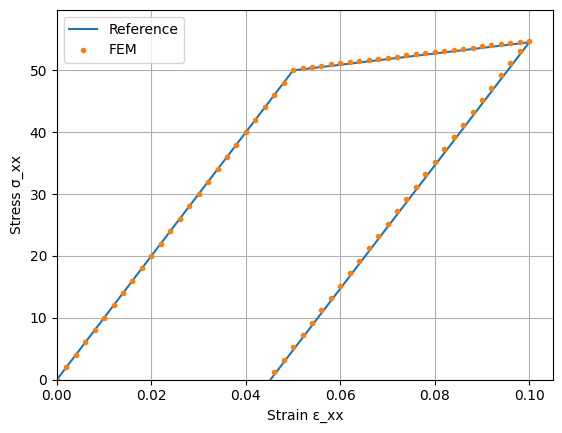

In [15]:
ref_strain = [0.0, sigma_y / E, max(strain), max(strain) - max(stress) / E]
ref_stress = [0.0, sigma_y, k * E / (k + E) * (max(strain) + sigma_y / k), 0]


plt.plot(ref_strain, ref_stress, "-", label="Reference")
plt.plot(strain, stress, ".", label="FEM")
plt.xlabel("Strain ε_xx")
plt.ylabel("Stress σ_xx")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()
plt.legend()
plt.show()